# Step 1:

We import the packages we are going to use. Each package is a tool within the Python ecosystem that someone has created that allow us to do something new without coding it ourselves (such as image analysis).

In the next example, we are going to load an Excel CSV file and analyse it. So we will need the following packages; Pandas and Numpy.

Pandas is our Dataframe package, numpy is our Numerical Python package

In [53]:
import pandas
import numpy

Example 1: we are going to load a dataframe into python and display it

In [16]:
# Load the csv file

df = pandas.read_csv("Data/Example.csv")

# Show first two rows (Notice the 2)
df.head(2)

# Notice that we didn't create a variable for this operation displaying the first tw rows, so it doesn't exist in our variable explorer.

,Country,Population (Millions)
0,Turkey,84.34
1,Iraq,40.22


In [17]:
# Let's look at variable assignment and displaying the dataframe.

LastTwoRows = df.tail(2)

# This doesn't print as we are assigning a variable. But we can display the variable this way:

print(LastTwoRows)

# Or

LastTwoRows

# Notice the difference in Display

  Country  Population (Millions)
2    Iran                  83.99
3   Syria                  17.50


,Country,Population (Millions)
2,Iran,83.99
3,Syria,17.50


Example 2: We are going to filter a dataframe

In [18]:
# We only want data for Turkey

TurkeyRow = df.loc[df['Country'] == "Turkey"]

# Here we use .loc and filter by the column name 'Country'

TurkeyRow

,Country,Population (Millions)
0,Turkey,84.34


### Lambda Functions

Lambda Functions are functions without a name. It is typically used for row-wise filtering logic. Here we will round the Population column row by row.

In [23]:
# Note we wrote Country differently here, instead of square brackets and quotation marks. We use quotation marks if there is a space in the column name

RoundedCountryPopulation = df['Population (Millions)'].apply(lambda x: round(x,1))

RoundedCountryPopulation

0    84.3
1    40.2
2    84.0
3    17.5
Name: Population (Millions), dtype: float64

Note that in Python, there are many ways of doing things and that it is quicker to round the whole column in one go. In this case as the workload is so small we won't see a difference, unless your computer is quite old:

In [24]:
RoundedCountryPopulation = round(df['Population (Millions)'], 1)

RoundedCountryPopulation

0    84.3
1    40.2
2    84.0
3    17.5
Name: Population (Millions), dtype: float64

### Loops

Loops in python allow us to, like lambda functions, allow us to iterate and repeat an operation on data. Here, we will only round the Population if the country name is Turkey:

In [31]:
# We copy the data so we don't affect the original data
RoundedCountryPopulation = df.copy()

for i in range(0, len(RoundedCountryPopulation)):

    x = RoundedCountryPopulation.Country.loc[i]

    if x == 'Turkey':

        # Print Turkey if the Country is Turkey
        print(x)

        # Round the Value for Turkey's population
        RoundedCountryPopulation.loc[i, 'Population (Millions)'] = round(RoundedCountryPopulation.loc[i, 'Population (Millions)'], 0)

    else:

        # Do nothing for any other country

        pass

print('Population of Turkey has been Rounded to the nearest whole number')

RoundedCountryPopulation

Turkey
Population of Turkey has been Rounded to the nearest whole number


,Country,Population (Millions)
0,Turkey,84.00
1,Iraq,40.22
2,Iran,83.99
3,Syria,17.50


Notice if we write this in the same way as a Lambda Function, it's much more concise:

In [49]:
RoundedCountryPopulation = df[['Country', 'Population (Millions)']].apply(lambda x: round(x['Population (Millions)'],0) if x.Country == 'Turkey' else x['Population (Millions)'], axis=1)

RoundedCountryPopulation

0    84.00
1    40.22
2    83.99
3    17.50
dtype: float64

### Replacing Text

Sometimes with Data you'll need to replace text that is incorrect in the data. Here, we change Iran to Tunisia.

In [50]:
df.Country = df.Country.replace('Iran', 'Tunisia')

df

,Country,Population (Millions)
0,Turkey,84.34
1,Iraq,40.22
2,Tunisia,83.99
3,Syria,17.50


We can replace characters as well, row by row.

In [51]:
# Here we won't assign a variable and go row by row, see the for which represents a loop.

[x.replace("a", '-') for x in df.Country]

['Turkey', 'Ir-q', 'Tunisi-', 'Syri-']

Let's utilize these skills to graph data we've been using.

In [132]:
ForeignMinistryStatements = pandas.read_csv('Data/Turkish Foreign Ministry Statements - Press Releases - KRG.csv')

ForeignMinistryStatements.head(5)

,Date (dd/mm/yyyy),Date (mm/dd/yyyy),Title,English Title,Link,Sentiment,Kurds in Turkey,Kurds in Syria,Kurds in Iraq,Kurds in Iran,Turkey's National Security,Independence or Autonomy,PKK/SDF/YPG/YPJ/YBS/QSD,Which group?,ISIS/Daesh,Undefined terrorism or national security threat,Full Text
0,1998-04-01,1/4/1998,Türkiye Dışişleri Bakanı Sayın İsmail Cem'in İ...,Letter sent by Turkish Foreign Minister Mr. İs...,https://www.mfa.gov.tr/letter-sent-by-turkish-...,NaN,0,0,0.0,0,0,0.0,0,0,0,0.0,"Dear Colleague and Friend, \n \n I have receiv..."
1,1998-03-03,3/3/1998,Türk ve Ürdün Tarafları Tarafından Verilen Ort...,Joint Communique Given By Turkish And Jordan S...,https://www.mfa.gov.tr/joint-communique-given-...,NaN,0,0,0.0,0,0,0.0,0,0,0,0.0,"On 26-27 February 1998, His Excellency Mr. Ism..."
2,20/10/1998,10/20/1998,Dışişleri Bakanı İsmail Cem'in Türkiye-Suriye ...,"Statement Made By İsmail Cem, Foreign Minister...",https://www.mfa.gov.tr/_p_statement-made-by-is...,NaN,0,0,0.0,0,0,0.0,1,PKK,0,0.0,"""We will carefully monitor the implementation ..."
3,21/12/1998,12/21/1998,"Türkiye, Irak'a Yönelik ABD-İngiltere Ortak Ha...",Turkey Welcomes The Cessation Of The Joint US-...,https://www.mfa.gov.tr/turkey-welcomes-the-ces...,NaN,0,0,0.0,0,0,0.0,0,0,0,0.0,Turkey welcomes the cessation on 20 December o...
4,28/12/1998,12/28/1998,Basın Bülteni Irak güçleri ile ABD Uçağı arası...,Press Release Regarding the latest clash betwe...,https://www.mfa.gov.tr/_p_press-release-regard...,NaN,0,0,0.0,0,0,0.0,0,0,0,0.0,"Today, Iraqi forces missiles fired ground-to-a..."


We are going to graph the number of PKK mentions in MFA statements over time. Therefore we only need the date and the 'Which Group' Column.

In [133]:
ForeignMinistryStatements = ForeignMinistryStatements[['Date (dd/mm/yyyy)', 'Which group?']]

ForeignMinistryStatements.head(5)

,Date (dd/mm/yyyy),Which group?
0,1998-04-01,0
1,1998-03-03,0
2,20/10/1998,PKK
3,21/12/1998,0
4,28/12/1998,0


For the dates, we need it to be in one common format. We write a filter for both formats, then fill the missing values in the first group with those of the second and use that as the date column

In [134]:
#ForeignMinistryStatements['Date (dd/mm/yyyy)'].replace('-', '/', inplace = True)

Date1 = pandas.to_datetime(ForeignMinistryStatements['Date (dd/mm/yyyy)'], errors='coerce', format='%Y-%m-%d')
Date2 = pandas.to_datetime(ForeignMinistryStatements['Date (dd/mm/yyyy)'], errors='coerce', format='%d/%m/%Y')

ForeignMinistryStatements['Date (dd/mm/yyyy)'] = Date1.fillna(Date2)

ForeignMinistryStatements.head(5)

,Date (dd/mm/yyyy),Which group?
0,1998-04-01,0
1,1998-03-03,0
2,1998-10-20,PKK
3,1998-12-21,0
4,1998-12-28,0


Now we only want the data for PKK mentions:

In [135]:
ForeignMinistryStatements = ForeignMinistryStatements[(ForeignMinistryStatements['Which group?'] == 'PKK') | (ForeignMinistryStatements['Which group?'] == 'Pkk') | (ForeignMinistryStatements['Which group?'] == 'pkk')]

ForeignMinistryStatements

,Date (dd/mm/yyyy),Which group?
2,1998-10-20,PKK
5,1999-08-01,PKK
7,1999-01-17,PKK
8,1999-01-19,PKK
9,1999-01-02,PKK
...,...,...
204,2020-03-07,PKK
205,2020-05-07,PKK
208,2020-12-08,PKK
210,2020-10-10,PKK


There are 73 statements. How does this look by year?

In [136]:
ForeignMinistryStatements['Which group?'] = 1

ForeignMinistryStatements.set_index('Date (dd/mm/yyyy)', inplace=True, drop=True)

ForeignMinistryStatements = ForeignMinistryStatements.resample('Y').agg('sum')

ForeignMinistryStatements.head(5)

,Which group?
Date (dd/mm/yyyy),
1998-12-31,1
1999-12-31,11
2000-12-31,0
2001-12-31,1
2002-12-31,0


Let's plot this:

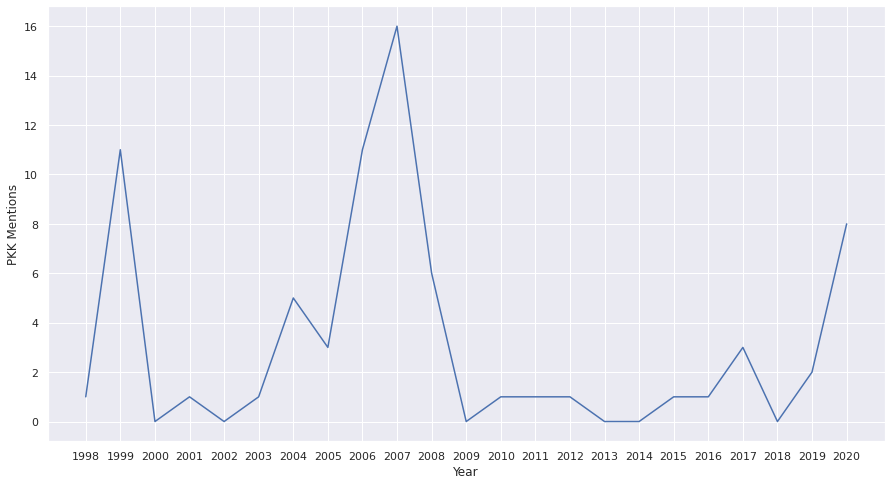

In [175]:
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.lineplot(x="Date (dd/mm/yyyy)", y="Which group?", data=ForeignMinistryStatements)

ax.set(xlabel = 'Year', ylabel = 'PKK Mentions')

sns.set(font_scale = 1)

ax.set(xticks=ForeignMinistryStatements.index)
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y"))

#set_xticks(range(len(ForeignMinistryStatements)-1))

## GeoSpatial Data

Python is quite useful for graphing quantitative data as well as geospatial data.